# Bài tập tự luận

### Code các phép toán liên quan đến vector và ma trận

In [ ]:
import numpy as np

**1.1 Length of a vector:**

In [ ]:
def compute_vector_length(vector):
    len_of_vector = np.sqrt(np.sum(np.square(vector)))
    return len_of_vector

**1.2 Dot product:**

In [ ]:
def compute_dot_product(vector1, vector2):
    result = np.dot(vector1, vector2)
    return result

**1.3 Multiplying a vector by a matrix:**

In [ ]:
def matrix_multi_vector(matrix, vector):
    result = np.dot(matrix, vector)
    return result

**1.4 Multiplying a matrix by a matrix:**

In [ ]:
def matrix_multi_matrix(matrix1, matrix2):
    result = np.dot(matrix1, matrix2)
    return result

**1.5 Matrix inverse:**

In [ ]:
def inverse_matrix(matrix):
    result = np.linalg.inv(matrix)
    return result

**2.1 Eigenvector and eigenvalue:**

In [ ]:
def compute_eigenvalues_eigenvectors(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvalues, eigenvectors

**3. Cosine Similarity:**

In [ ]:
def compute_cosine(v1, v2):
    cos_sim = compute_dot_product(v1, v2) / (compute_vector_length(v1) * compute_vector_length(v2))
    return cos_sim

### Background subtraction:

In [ ]:
import gdown
from google.colab.patches import cv2_imshow
import cv2

# Download the images
gdown.download('https://drive.google.com/uc?id=1X78_4B8A6Z4aN-qpsEaA_RLvkNfwoIrQ', 'GreenBackground.png', quiet=False)
gdown.download('https://drive.google.com/uc?id=1Gv-H6SVaYK8XDs3RPlOS_Rq0a8cZkA8w', 'NewBackground.png', quiet=False)
gdown.download('https://drive.google.com/uc?id=1RnBB-dsB3b77rCdOcaPdqpBOVJ_P3h07', 'Object.png', quiet=False)

# Read the images
bg1_image = cv2.imread('GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

bg2_image = cv2.imread('NewBackground.png', 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

ob_image = cv2.imread('Object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))


Downloading...
From: https://drive.google.com/uc?id=1X78_4B8A6Z4aN-qpsEaA_RLvkNfwoIrQ
To: /content/GreenBackground.png
100%|██████████| 5.51k/5.51k [00:00<00:00, 8.46MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Gv-H6SVaYK8XDs3RPlOS_Rq0a8cZkA8w
To: /content/NewBackground.png
100%|██████████| 64.3k/64.3k [00:00<00:00, 45.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RnBB-dsB3b77rCdOcaPdqpBOVJ_P3h07
To: /content/Object.png
100%|██████████| 51.0k/51.0k [00:00<00:00, 58.8MB/s]


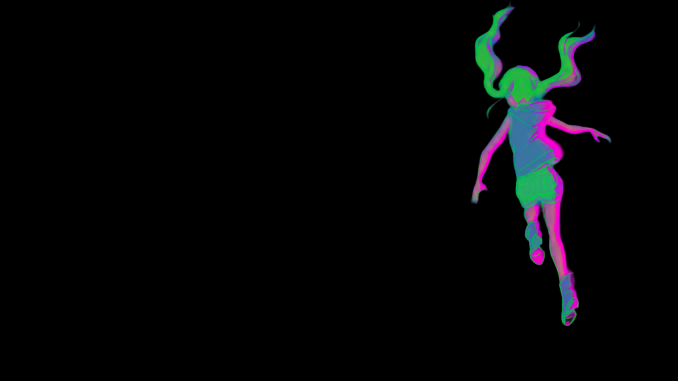

In [ ]:
def compute_difference(bg_img, input_img):
    difference_single_channel = cv2.absdiff(bg_img, input_img)

    return difference_single_channel

difference_single_channel = compute_difference ( bg1_image , ob_image )
cv2_imshow ( difference_single_channel )

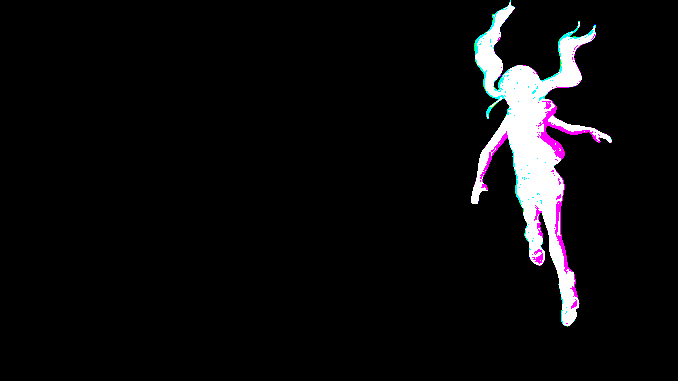

In [ ]:
def compute_binary_mask(difference_single_channel):
    _, difference_binary = cv2.threshold(difference_single_channel, 10, 255, cv2.THRESH_BINARY)

    return difference_binary

binary_mask = compute_binary_mask(difference_single_channel)
cv2_imshow(binary_mask)

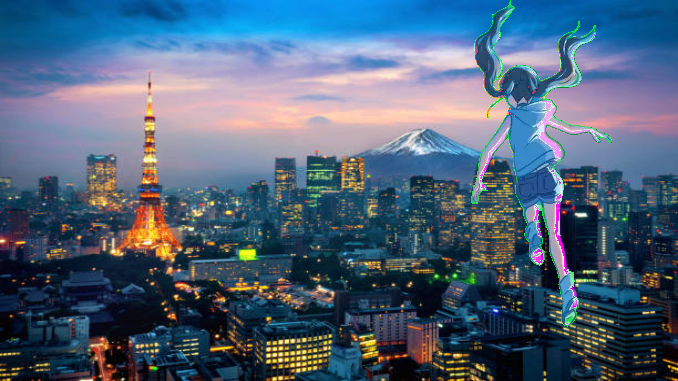

In [ ]:
def replace_background(bg1_image, bg2_image, ob_image):
    difference_single_channel = compute_difference (
        bg1_image,
        ob_image
    )

    binary_mask = compute_binary_mask(difference_single_channel)

    output = np.where(binary_mask == 255, ob_image, bg2_image)

    return output

output = replace_background(bg1_image, bg2_image, ob_image)
cv2_imshow(output)

# Bài tập trắc nghiệm

1. Kết quả của đoạn code sau đây là gì

In [ ]:
vector = np.array([-2, 4, 9, 21])
result = compute_vector_length(vector)
print(round(result,2))

23.28


2. Kết quả của đoạn code sau đây là gì

In [ ]:
v1 = np.array([0, 1, -1, 2])
v2 = np.array([2, 5, 1, 0])
result = compute_dot_product(v1, v2)
print(round(result,2))

4


3. Kết quả của đoạn code sau đây là gì

In [ ]:
x = np.array([[1, 2], [3, 4]])
k = np.array([1, 2])
print('result \n', x.dot(k))

result 
 [ 5 11]


4. Kết quả của đoạn code sau đây là gì

In [ ]:
x = np.array([[-1, 2], [3, -4]])
k = np.array([1, 2])
print('result \n', x @ k)

result 
 [ 3 -5]


5. Kết quả của đoạn code sau đây là gì

In [ ]:
m = np.array([[-1, 1, 1], [0, -4, 9]])
v = np.array([0, 2, 1])
result = matrix_multi_vector(m, v)
print(result)

[3 1]


6. Kết quả của đoạn code sau đây là gì

In [ ]:
m1 = np.array([[0, 1, 2], [2, -3, 1]])
m2 = np.array([[1, -3], [6, 1], [0, -1]])
result = matrix_multi_matrix(m1, m2)
print(result)

[[  6  -1]
 [-16 -10]]


7. Kết quả của đoạn code sau đây là gì

In [ ]:
m1 = np.eye(3)
m2 = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
result = m1 @ m2
print(result)

[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


8. Kết quả của đoạn code sau đây là gì

In [ ]:
m1 = np.eye(2)
m1 = np.reshape(m1, (-1, 4))[0]
m2 = np.array([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
result = m1 @ m2
print(result)

[5. 5. 5. 5.]


9. Kết quả của đoạn code sau đây là gì

In [ ]:
m1 = np.array([[1, 2], [3, 4]])
m1 = np.reshape(m1, (-1, 4), "F")[0]
m2 = np.array([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
result = m1 @ m2
print(result)

[29 29 29 29]


10. Kết quả của đoạn code sau đây là gì

In [ ]:
m1 = np.array([[-2, 6], [8, -4]])
result = inverse_matrix(m1)
print(result)

[[0.1  0.15]
 [0.2  0.05]]


11. Kết quả của đoạn code sau đây là gì

In [ ]:
matrix = np.array([[0.9, 0.2], [0.1, 0.8]])
eigenvalues, eigenvectors = compute_eigenvalues_eigenvectors(matrix)
print(eigenvectors)

[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


12. Kết quả của đoạn code sau đây là gì

In [ ]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 0, 3, 0])
result = compute_cosine(x, y)
print(round(result, 3))

0.577
